# Physics behind the Sunyaev-Zel'dovich effect

## Single electron-photon scattering

In this section, we inspect the electron-photon scattering process. At the smallest scale, the SZ effect comes from single electron-photon scatterings and as such, it is good to investigate this part a little bit.

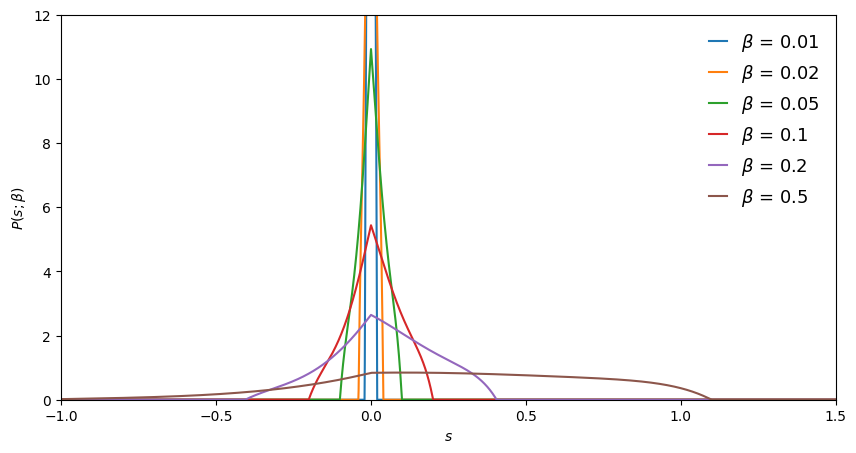

In [16]:
import numpy as np
import matplotlib.pyplot as pt

import MockSZ.Models as MModels

%matplotlib inline

num_arr = 3000  

s = np.linspace(-1, 1.5, num=num_arr)                                                                                                                                     
beta = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5])                                                                                                                                                            

simObj = MModels.ScatteringKernels()

fig, ax = pt.subplots(1,1, figsize=(10,5))

for i in beta:
    amplitudes = simObj.getSingleScattering(s, i)  
    ax.plot(s, amplitudes, label=r"$\beta$ = {}".format(i))
ax.set_ylim(0, 12)
ax.set_xlim(-1, 1.5)
    
ax.set_ylabel(r"$P(s;\beta)$")
ax.set_xlabel(r"$s$")
ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()


The curves in the left panel represent the scattering probability $P(s;\beta)$: the probability that an electron with velocity $\beta = v / c$ in the lab frame undergoes a scattering interaction with a photon at frequency $\nu_0$, such that the photon has a new frequency $\nu$, averaged over all photon incidence angles $\mu$. This frequency shift is expressed by the logarithmic frequency shift $s=\ln(\frac{\nu}{\nu_0})$.

Note how the scattering probability grows wider and more asymmetric for increasing $\beta$, showing a higher probability for upscattering. This is due to the higher electron velocity, which increases he probability of upscattering a photon.

As a check, we calculated the total integrated $P(s;\beta)$ over $s$, $P_\mathrm{tot}$. Because $P(s;\beta)$ is a probability, this value should be 1. In the right panel, we show the error of our calculation. It can be seen that the error is on the order of a thousandth which serves as a reassuring sanity check.

## The electron distributions
Now, having discussed the single electron-photon scattering case, we need to discuss electron distributions. Since a radiation field may interact with electrons at different velocities, the case of scattering off an ensemble of electrons needs to be implemented. The first distribution we encounter is a Maxwell-Juttner distribution, also known as a relativistic thermal distribution.


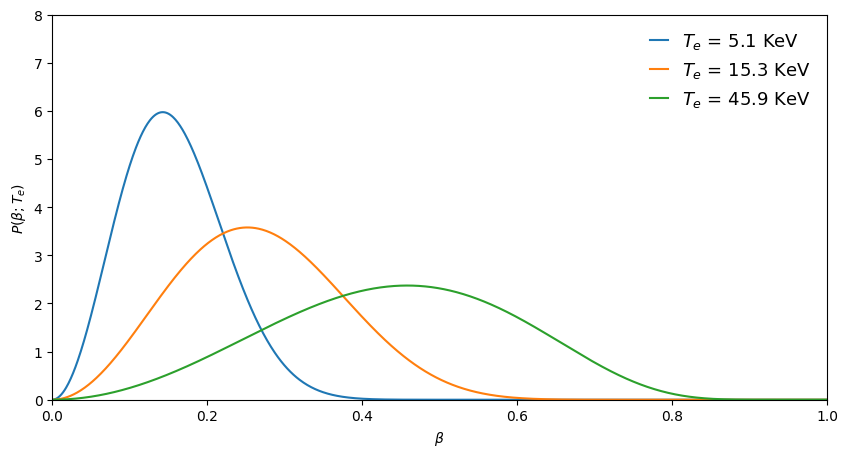

In [17]:
beta_arr = np.linspace(0, 1, 1000)

Te = np.array([5.1, 15.3, 45.9])

fig, ax = pt.subplots(1,1, figsize=(10,5))

for i in Te:
    amplitudes = simObj.getMaxwellJuttner(beta_arr, i)

    ax.plot(beta_arr, amplitudes, label=r"$T_e$ = {} KeV".format(i))
ax.set_ylim(0, 8)
ax.set_xlim(0, 1)
    
ax.set_ylabel(r"$P(\beta;T_e)$")
ax.set_xlabel(r"$\beta$")
ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

In addition to a thermalised distribution, ```MockSZ``` can also simulate a non-thermal distributions, the powerlaw distribution.

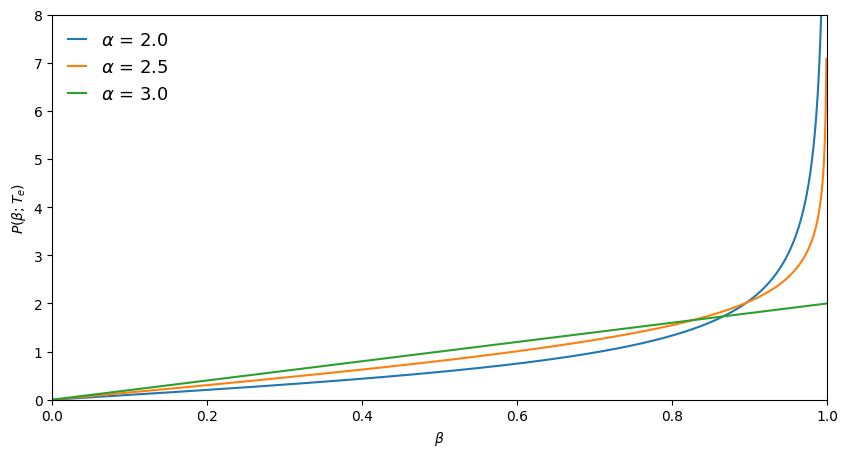

In [18]:
alpha = np.array([2, 2.5, 3])

fig, ax = pt.subplots(1,1, figsize=(10,5))

for i in alpha:
    amplitudes = simObj.getPowerlaw(beta_arr, i)

    ax.plot(beta_arr, amplitudes, label=r"$\alpha$ = {}".format(i))
ax.set_ylim(0, 8)
ax.set_xlim(0, 1)
    
ax.set_ylabel(r"$P(\beta;T_e)$")
ax.set_xlabel(r"$\beta$")
ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

## Photon scattering from an electron population

Now that we have discussed the single electron-photon scattering scenario, it is time to discuss the case of photon scattering from an electron population. The difference is that instead of a single $\beta$, an electron population contains a whole range of $\beta$'s. This is reflected by including the electron distribution in the total probability. It should be noted that each scattering probability shown here is for a single scattering per photon only. This amounts to us setting $\tau_\mathrm{e}=1$.

We start by showing scattering probabilities for a relativistic Maxwellian distributions of electrons.

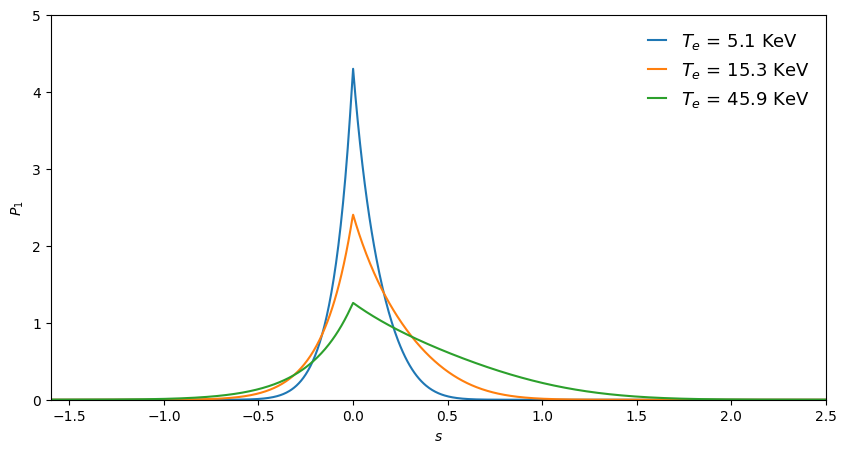

In [19]:
Te = np.array([5.1, 15.3, 45.9])
s_arr = np.linspace(-1.6, 2.5, num=1000)  

fig, ax = pt.subplots(1,1, figsize=(10,5))

for i in Te:
    amplitudes = simObj.getMultiScatteringMJ(s_arr, i)
    ax.plot(s_arr, amplitudes, label=r"$T_e$ = {} KeV".format(i))
ax.set_ylim(0, 5)
ax.set_xlim(-1.6, 2.5)
    
ax.set_ylabel(r"$P_1$")
ax.set_xlabel(r"$s$")
ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

It can be seen that the higher the electron temperature $T_\mathrm{e}$, the broader the distribution becomes. This is expected from the Maxwellian distribution, which gets broader with increasing $T_\mathrm{e}$.

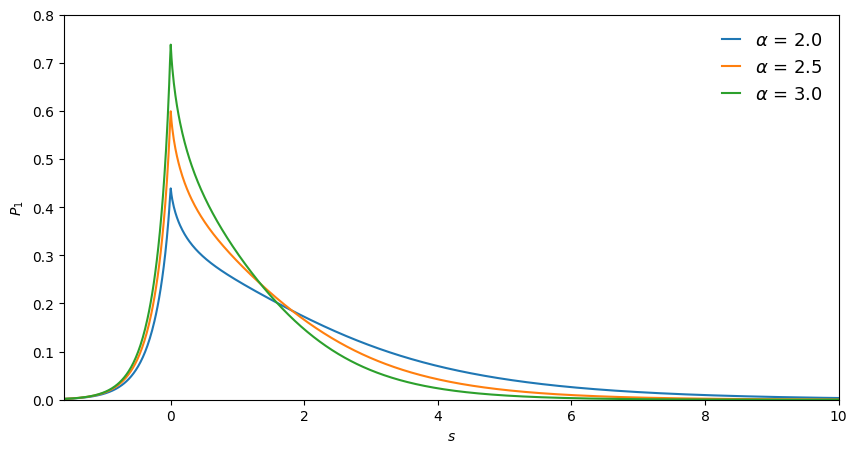

In [20]:
s_arr = np.linspace(-1.6, 10, num=1000)  

fig, ax = pt.subplots(1,1, figsize=(10,5))

for i in alpha:
    amplitudes = simObj.getMultiScatteringPL(s_arr, i)
    ax.plot(s_arr, amplitudes, label=r"$\alpha$ = {}".format(i))
ax.set_ylim(0, 0.8)
ax.set_xlim(-1.6, 10)
    
ax.set_ylabel(r"$P_1$")
ax.set_xlabel(r"$s$")
ax.legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

It is immediately visible that the upscattering tail ($s>0$) is a lot longer than the thermal scattering kernel. This causes the ntSZ signal (see the tutorial on single-pointing signals) to also extend to higher frequencies compared to the tSZ signal.